# Movie reviews using Recurrent Nerual Networks

In [10]:
# import libraries
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Flatten, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

import matplotlib.pyplot as plt

## Load IMDB from Keras dataset

In [15]:
# Vocabulary size is 2000
num_words = 2000
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=num_words,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

## Pad the sequence to the same length

In [16]:
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

## Create and compile model

In [17]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_vector_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           64000     
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 81,025
Trainable params: 81,025
Non-trainable params: 0
__________________________________________________

## Fit The Model

In [18]:
train_history = model.fit(X_train, y_train, batch_size=32,
                          epochs=10, verbose=2,
                          validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 - 128s - loss: 0.4631 - acc: 0.7692 - val_loss: 0.3817 - val_acc: 0.8298
Epoch 2/10
20000/20000 - 130s - loss: 0.3229 - acc: 0.8648 - val_loss: 0.3861 - val_acc: 0.8222
Epoch 3/10
20000/20000 - 120s - loss: 0.2810 - acc: 0.8864 - val_loss: 0.3789 - val_acc: 0.8596
Epoch 4/10
20000/20000 - 127s - loss: 0.2610 - acc: 0.8979 - val_loss: 0.3030 - val_acc: 0.8762
Epoch 5/10
20000/20000 - 123s - loss: 0.2406 - acc: 0.9028 - val_loss: 0.3200 - val_acc: 0.8720
Epoch 6/10
20000/20000 - 133s - loss: 0.2299 - acc: 0.9090 - val_loss: 0.3399 - val_acc: 0.8698
Epoch 7/10
20000/20000 - 137s - loss: 0.2156 - acc: 0.9149 - val_loss: 0.3610 - val_acc: 0.8602
Epoch 8/10
20000/20000 - 137s - loss: 0.2004 - acc: 0.9212 - val_loss: 0.3362 - val_acc: 0.8654
Epoch 9/10
20000/20000 - 132s - loss: 0.1974 - acc: 0.9237 - val_loss: 0.3308 - val_acc: 0.8676
Epoch 10/10
20000/20000 - 121s - loss: 0.1869 - acc: 0.9263 - val_loss: 0.4439 - val_ac

## Show train and validation history: loss and accuracy

In [19]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

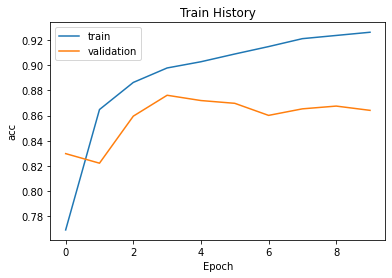

In [20]:
show_train_history(train_history,'acc','val_acc')

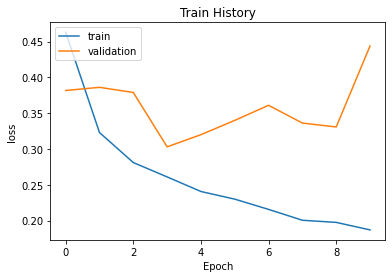

In [21]:
show_train_history(train_history,'loss','val_loss')

## Evaluate model by test set

In [22]:
scores = model.evaluate(X_test, y_test, verbose=1)
scores[1]

25000/25000 [==============================] - 32s 1ms/sample - loss: 0.4368 - acc: 0.8641


0.86412

## Predict test data

In [23]:
predict=model.predict_classes(X_test)
predict_classes=predict.reshape(len(X_test))

In [24]:
def get_original_text(i):
    word_to_id = imdb.get_word_index()
    word_to_id = {k:(v+3) for k,v in word_to_id.items()}
    word_to_id["<PAD>"] = 0
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2

    id_to_word = {value:key for key,value in word_to_id.items()}
    return ' '.join(id_to_word[id] for id in X_test[i])

In [25]:
SentimentDict={1:'positive', 0:'negative'}
def display_test_sentiment(i):
    print(get_original_text(i))
    print('label: ', SentimentDict[y_test[i]], ', prediction: ', SentimentDict[predict_classes[i]])

In [28]:
display_test_sentiment(5)

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

In [29]:
display_test_sentiment(12000)

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> i saw this movie on <UNK> with my younger brother a long time ago de